In [13]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams["font.size"] = 15
plt.rcParams["figure.figsize"] = (8, 6)

**정규분포(normal distribution)** 혹은 가우스 정규분포(Gaussian normal distribution)라는 분포는 자연 현상에서 나타나는 숫자를 확률 모형으로 모형화할 때 많이 사용한다.

정규분포는 평균 $\mu$와 분산 $\sigma^2$이라는 두 모수만으로 정의되며 확률밀도함수(pdf: probability density function)는 다음과 같은 수식으로 표현된다.

$$
\begin{align}
\mathcal{N}(x; \mu, \sigma^2) = \dfrac{1}{\sqrt{2\pi\sigma^2}} \exp \left(-\dfrac{(x-\mu)^2}{2\sigma^2}\right)
\tag{1}
\end{align}
$$

분산의 역수를 정밀도(precision) $\beta$라고 부르기도 한다.

$$
\begin{align}
\beta = \dfrac{1}{\sigma^2}
\tag{2}
\end{align}
$$

정규분포 중에서도 평균이 0이고 분산이 1인 ($\mu=0$, $\sigma^2=1$) 정규분포를 **표준정규분포(standard normal distribution)**라고 한다.

정규분포의 확률밀도함수는 다음과 같은 성질을 가진다.

* $x=\mu$일 때 확률밀도가 최대가 된다.
* $x=\infty$로 다가가거나 $x=-\infty$로 다가갈수록 확률밀도가 작아진다.

출처:데이터사이언스스쿨

In [3]:
# 파이

np.pi

3.141592653589793

In [5]:
import math

In [6]:
math.e

2.718281828459045

In [4]:
# math.e 해당 승을 해 줌 -> 차례대로 2.7182^1 / 2.7182^2 / 2.7182^3

np.exp([1, 2, 3])

array([ 2.71828183,  7.3890561 , 20.08553692])

In [10]:
x = np.linspace(-5, 5, 100)
y = (1/np.sqrt(2*np.pi))*np.exp(-x**2/2)

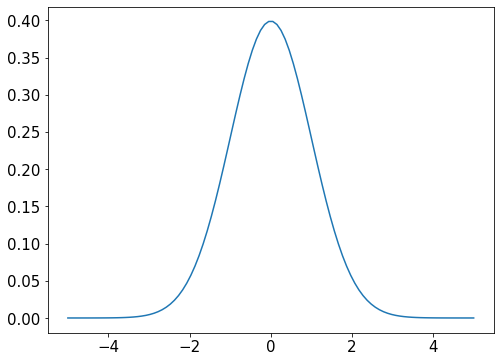

In [11]:
plt.plot(x,y)
plt.show()

In [14]:
# 표준정규분포
# 평균이 0, 분산이 1인 표준 정규분포 객체 반환

rv = stats.norm(0, 1)
rv

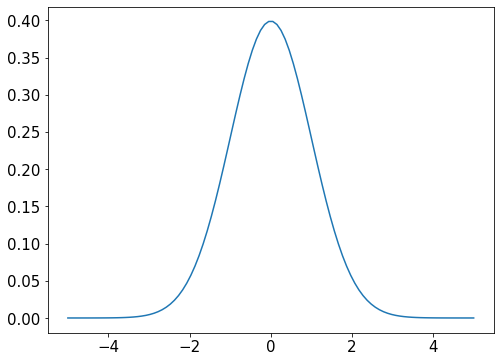

In [15]:
# 객체를 사용해서 .pdf(x)

# y = (1/np.sqrt(2*np.pi))*np.exp(-x**2/2) 랑 같음

rv = stats.norm(0, 1)
x = np.linspace(-5, 5, 100)
y1 = rv.pdf(x) # 확률 밀도 함수
plt.plot(x, y1)
plt.show()

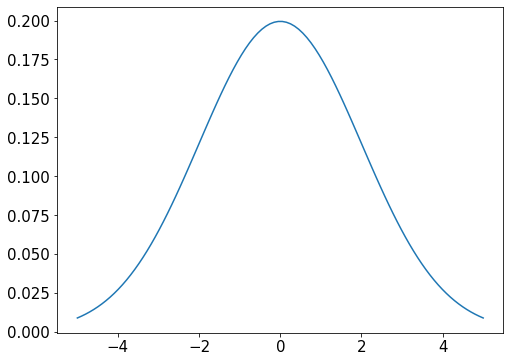

In [18]:
rv = stats.norm(0, 2)
x = np.linspace(-5, 5, 100)
y1 = rv.pdf(x) # 확률 밀도 함수
plt.plot(x, y1)
plt.show()

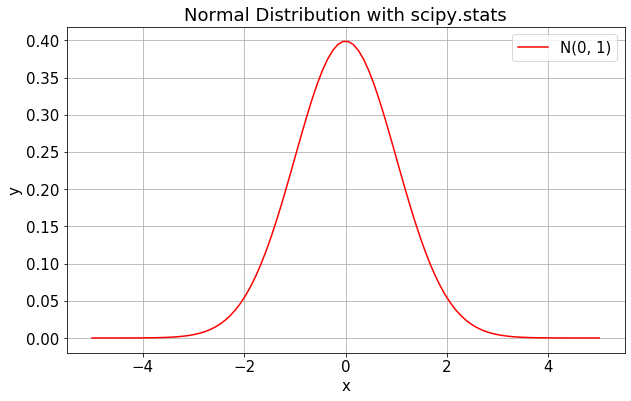

In [19]:
rv = stats.norm(0, 1)
y1 =rv.pdf(x)        
plt.figure(figsize=(10, 6))          # 플롯 사이즈 지정
plt.plot(x, y1, color="red")         # 선을 빨강색으로 지정하여 plot 작성          
plt.xlabel("x")                      # x축 레이블 지정
plt.ylabel("y")                      # y축 레이블 지정
plt.grid()                           # 플롯에 격자 보이기
plt.title("Normal Distribution with scipy.stats")     # 타이틀 표시
plt.legend(["N(0, 1)"])              # 범례 표시
plt.show() 

In [20]:
# 평균, 표준편차를 인자로 적어줌

rv = stats.norm(0, 1)

In [22]:
# cdf : 누적 확률 분포

rv.cdf(0)

0.5

In [24]:
rv.cdf(1)

0.8413447460685429

In [25]:
# ppf : 확률 -> 분위수
# cdf의 역

rv.ppf(0.5)

0.0

In [26]:
rv.ppf(0.8413447460685429)

1.0

In [27]:
rv.cdf(1)-rv.cdf(0)

0.3413447460685429

In [28]:
# p(-2 < x < 2) 확률을 구하시오
rv.cdf(2)-rv.cdf(-2)

0.9544997361036416

In [29]:
# 어느 고등학교의 전교생의 상위 5%의 수학점수가 얼마인지 구하시오
# 0.95의 분위수를 구하라

rv.ppf(0.95)

1.6448536269514722

# 표준화

In [30]:
data = np.random.randint(30, size=(6, 5)) # 6행 5열 0~30까지 랜덤하게 추출
data

array([[24, 20,  9, 20,  8],
       [21, 16,  5,  9, 13],
       [28, 15, 11, 20, 14],
       [11,  0, 21, 25, 19],
       [26,  8,  0, 16, 14],
       [10, 10,  7,  3,  1]])

### 방법1 : 평균을 빼주고 표준편차로 나눠줌

In [36]:
datastd = (data - np.mean(data, axis=0)) / np.std(data, axis=0)
datastd

array([[ 0.56758052,  1.31288158,  0.02588035,  0.60724008, -0.61631563],
       [ 0.14189513,  0.69505496, -0.59524798, -0.87712456,  0.26413527],
       [ 1.13516105,  0.5405983 ,  0.33644451,  0.60724008,  0.44022545],
       [-1.27705618, -1.77625155,  1.88926534,  1.28195128,  1.32067636],
       [ 0.85137079, -0.5405983 , -1.37165839,  0.06747112,  0.44022545],
       [-1.41895131, -0.23168499, -0.28468382, -1.686778  , -1.8489469 ]])

### 방법2 : stats.zscore(data) 함수 사용

In [33]:
# stats.zscore 함수는 표준화 시켜줌

stats.zscore( data )

array([[ 0.56758052,  1.31288158,  0.02588035,  0.60724008, -0.61631563],
       [ 0.14189513,  0.69505496, -0.59524798, -0.87712456,  0.26413527],
       [ 1.13516105,  0.5405983 ,  0.33644451,  0.60724008,  0.44022545],
       [-1.27705618, -1.77625155,  1.88926534,  1.28195128,  1.32067636],
       [ 0.85137079, -0.5405983 , -1.37165839,  0.06747112,  0.44022545],
       [-1.41895131, -0.23168499, -0.28468382, -1.686778  , -1.8489469 ]])

### 방법3 : 스케일러 사용 - 사이킷런

In [37]:
from sklearn.preprocessing import StandardScaler

In [38]:
st = StandardScaler()
result = st.fit_transform(data)
result

array([[ 0.56758052,  1.31288158,  0.02588035,  0.60724008, -0.61631563],
       [ 0.14189513,  0.69505496, -0.59524798, -0.87712456,  0.26413527],
       [ 1.13516105,  0.5405983 ,  0.33644451,  0.60724008,  0.44022545],
       [-1.27705618, -1.77625155,  1.88926534,  1.28195128,  1.32067636],
       [ 0.85137079, -0.5405983 , -1.37165839,  0.06747112,  0.44022545],
       [-1.41895131, -0.23168499, -0.28468382, -1.686778  , -1.8489469 ]])

## 문제

1. 어느 회사에서 종업원들의 근무기간을 조사하였는데, 종업원들의 근무기간은 평균이 11년이고 표준편차가 4년인 정규분포를 따른다고 한다. 그럼 이 회사에서 14년 이상 근무한 종업원의 비율을 구하시오


In [41]:
# 방법1 : 정규분포

rv = stats.norm(11, 4) # 평균, 표준편차 쓰기
1-rv.cdf(14)

0.75

In [43]:
P(x > 14)
P(z >= (14-11)/4)

NameError: name 'P' is not defined

In [44]:
(14-11)/4

0.75

In [45]:
# 방법2 : 표준정규분포

rv = stats.norm(0, 1)
1 - rv.cdf((14-11)/4)

0.22662735237686826

2. 어느 전구회사에서 생산하는 전구의 수명은 평균이 800일이고 표준편차가 30일인 정규분포를 따른다고 한다. 그럼 전구의 수명이 760일 이하일 확률을 구하시오.

In [42]:
rv = stats.norm(800, 30)
rv.cdf(760)

0.09121121972586788

3. 어느 고등학교 3학년 학생들의 수학 성적은 평균이 70점이고 분산이 64점인 정규분포를 따른다고 한다. 그럼 점수가 80점 이상이고, 90점 이하일 확률을 구하시오.

In [49]:
# 표준정규분포

rv = stats.norm(0, 1)
rv.cdf((90-70)/math.sqrt(64)) - rv.cdf((80-70)/math.sqrt(64))

0.09944010834107919

In [48]:
# 정규분포

rv = stats.norm(70, math.sqrt(64))
rv.cdf(90)-rv.cdf(80)

0.09944010834107919

# z 검정

- 귀무가설: 표본평균의 평균은 모평균과 같다 E(x) = m
- 대립가설: 아니다 $ E(x) \ne m $  (양측검정)
- 대립가설: 아니다 $ E(x) \gt m $  (단측검정)
- 모집단 정보가 있다


1. 0.02라는 낮은 확률로 표본이 뽑혔다
2. 가설이 틀렸다

- 이중 2번째 를 가지고 판별하는 것이 통계의 기본입장
- 귀무가설 기각(reject)
- 몇 % 까지를? 통계학에서 일반적인 으로 5%(0.05) 입장을 취한다
- 양측검정이면 (0.025), 단측검정( 0.05)

# p-value( 유의확률:significant probability)
- probability value(확률값)
- 샘플데이터를 이용하여 모집단을 추론할때 사용한다
- p값이 0.05 보다 작다: 어떤 사건이 우연히 발생할 확률이 5% 보다 작다(유의하다:원인과 결과가 있다 즉 우연이 아니다)
- 왜 5% 인가 :경험
- 0.05보다 작다 == 95% 보다 높다
- 0.01보다 작다 == 99% 보다 높다

### https://www.analyticsvidhya.com/blog/2020/06/statistics-analytics-hypothesis-testing-z-test-t-test/

In [ ]:
# 여학생 전체 평균(모평균) : 600
# 표본의 크기 : 20
# 표본의 평균 : 642
# 모집단편차 : 100
# p-value를 구하시오.

In [51]:
rv = stats.norm(0, 1)
p_value = 1 - rv.cdf((642 - 600) / (100 / math.sqrt(20)))
p_value # 귀무가설 기각 : 표본평균과 모평균은 차이가 있다

0.03017026645782328

In [54]:
zscore = (642 - 600) / (100 / math.sqrt(20))
rv = stats.norm(0, 1)
z_stat = rv.cdf(zscore)
print(z_stat)
pvalue = 1 - z_stat
print('p-value :', pvalue)

0.9698297335421767
p-value : 0.03017026645782328
